In [1]:
import sys
sys.path.append("../") # go to parent dir
from util.read_data import DataReader

Le'ts read the data from CSV file, the csv file contains the column names as well


In [6]:
reader = DataReader()
df = reader.read_all_data()

df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
DayOfWeek            object
Month                 int64
dtype: object

Le't now show few plots

In [7]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

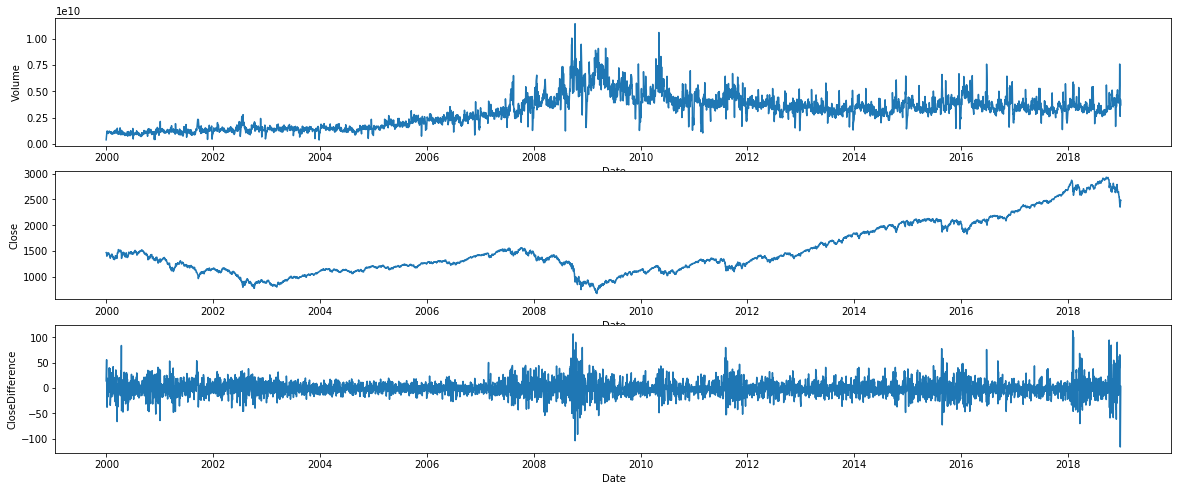

In [8]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(20, 8)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df['CloseDifference'] = df['Close'] - df['Close'].shift(-1)

sns.lineplot(df.Date, df.Volume, ax=ax[0])
sns.lineplot(df.Date, df.Close, ax=ax[1])
sns.lineplot(df.Date, df.CloseDifference, ax=ax[2])


The first plot is a plot of the volume in time. It has its high and low peeks. There seems to be the positive trend (increasing of a volume) at least between 2004 - 2008. The market between 2008 - 2009 was more volatile, due to the financial crisis.
The last graph shows difference betwen the Close price of two consecutive trading dates. There seems to be correlation between the trade Volume volatility of the price.

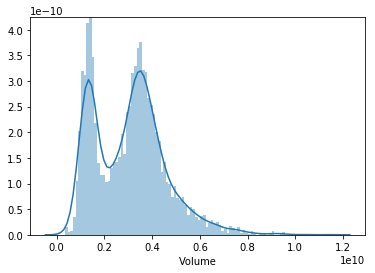

In [9]:
sns.distplot(df.Volume, bins=100)

There seems to be twoo peek in the distribution, peek with low volume of trade and peek with high volume of trades. 
Let's now try to find dependence on calendar day.

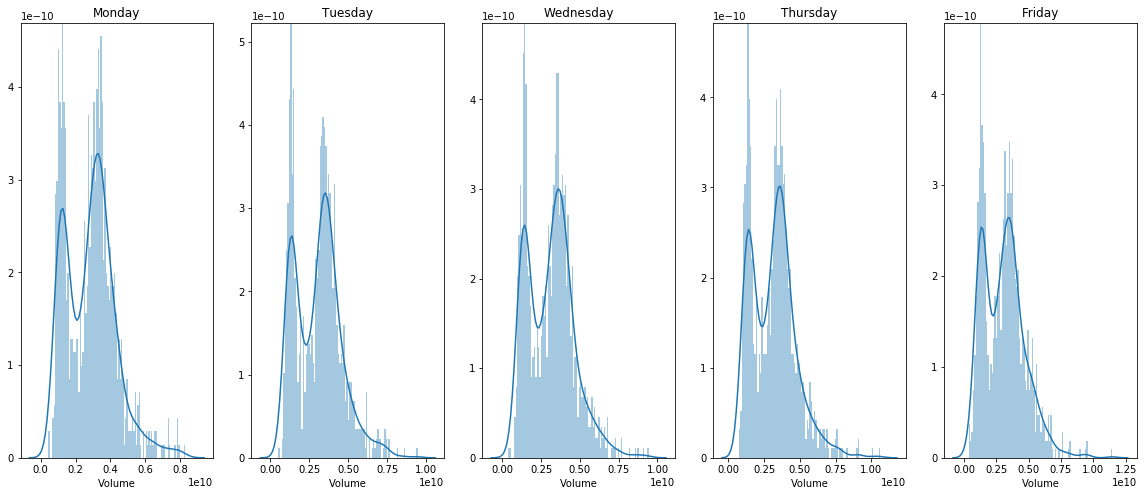

In [45]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20, 8)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for index, day in enumerate(days):
    plot = sns.distplot(df[df['DayOfWeek'] == day].Volume, bins=100, ax=ax[index])
    plot.set_title(calendar.day_name[index])


    The difference in distributions for different days justifies addind this feature to the mix for prediction of the Volume. Especially Monday seems to have generally trades with higher volumes, which makes sense, as it is first trading day after weekend and there is more chance that some significant information will appear which will influence the market.

Let's now try to find dependence on the month.

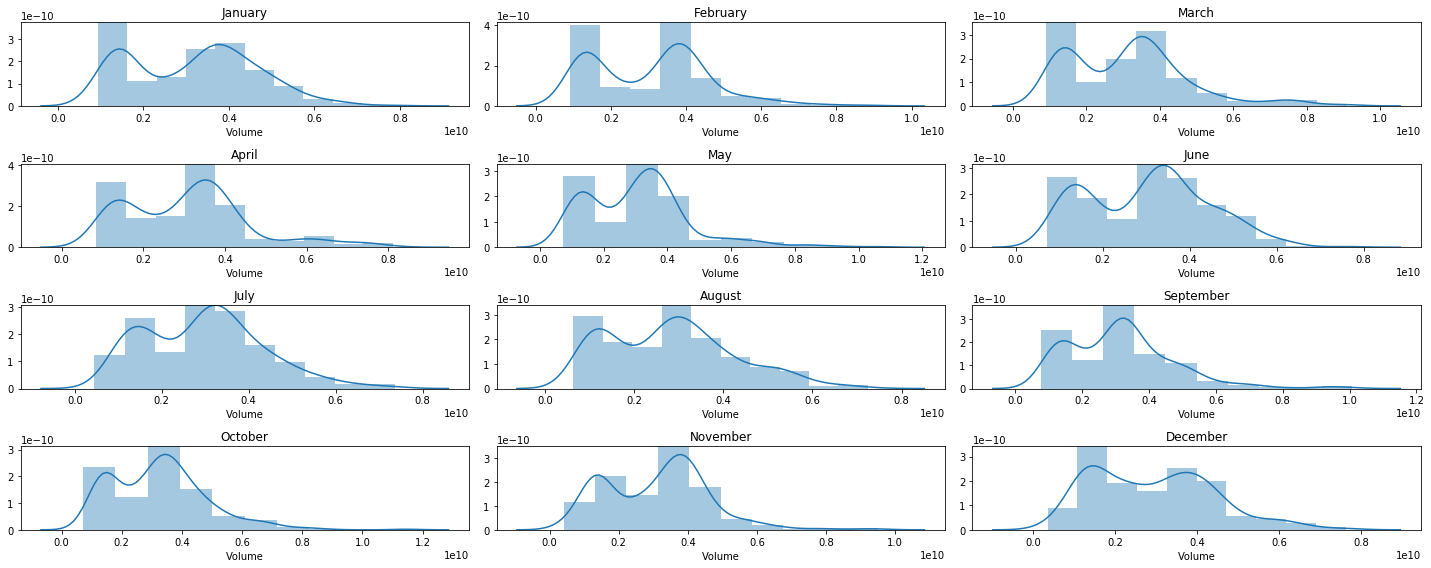

In [46]:
import calendar
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(20, 8)

months = range(1, 13)

for month in months:
    plot = sns.distplot(df[df['Month'] == month].Volume, bins=10, ax=ax[int((month-1) / 3), (month-1) % 3])
    plot.set_title(calendar.month_name[month])
fig.tight_layout()


The distribution shows that adding month feature could be usefull as well.